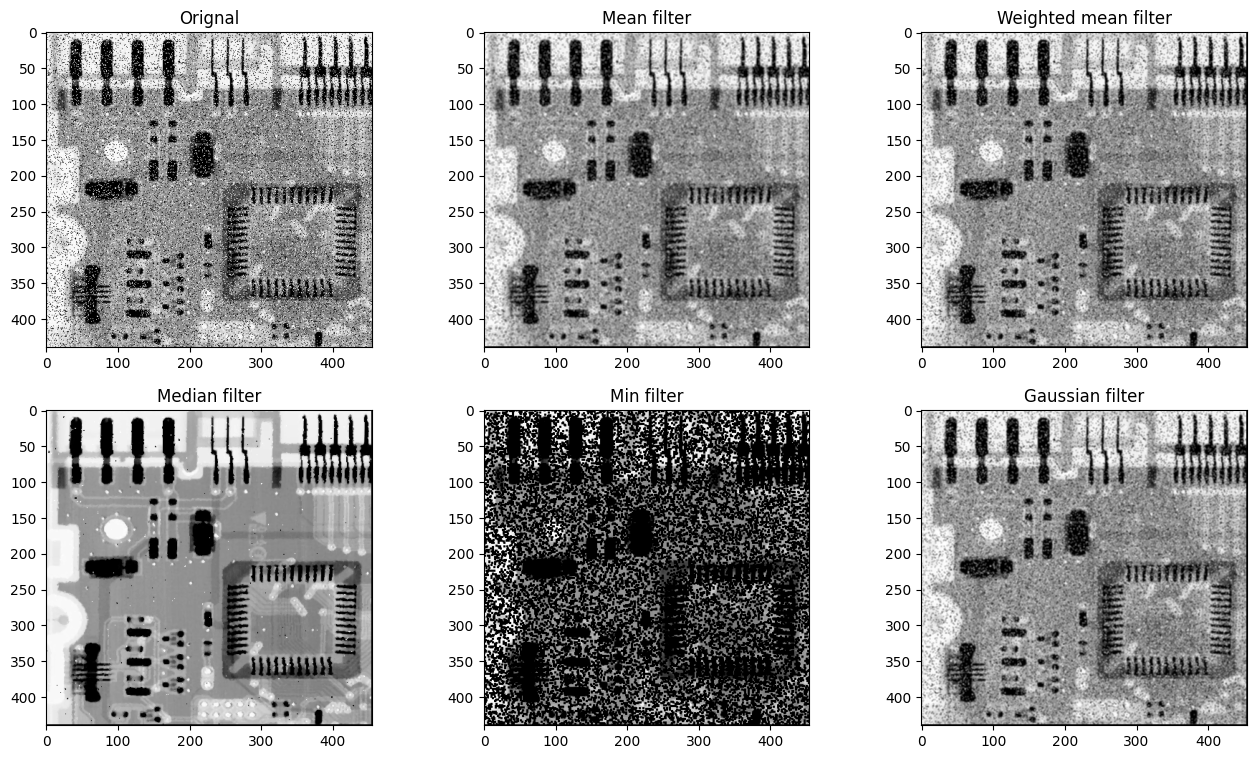

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
class lowpass_filter (object):
    def __init__ (self, image, convolution=None ) -> None :
        ''' constructor '''
        self.img=image
        self.convolution=convolution
        if convolution==True:
            self.init_kernel()
    def init_kernel(self):
        self.MeanKernel33=np.array([[1/9, 1/9, 1/9],
                                    [1/9, 1/9, 1/9],
                                    [1/9, 1/9, 1/9]], dtype ="float")
        self.MeanWeightKernel33=np.array (([ 1/16, 2/16, 1/16],
                                                [2/16, 4/16, 2/16],
                                                [1/16, 2/16, 1/16]) ,dtype ="float")
        self.GaussianKernel33=np.array (([0.0751/4.8976, 0.1238/4.8976, 0.0751/4.8976],
                                          [0.1238/4.8976,0.2042/4.8976, 0.1238/4.8976],
                                            [0.0751/4.8976, 0.1238/4.8976, 0.0751/4.8976])
                                            , dtype ="float")
    def choose_kernel (self,name:str ):
        '''
        - Mean
        - MeanWeight
        - Gaussian
        '''
        if name == 'Mean':
            kernel = self.MeanKernel33
        elif name == 'MeanWeight':
            kernel = self.MeanWeightKernel33
        elif name == 'Gaussian':
            kernel = self.GaussianKernel33
        else:
            return self.img   
        m, n = self.img.shape
        img_new = np.zeros ([m, n], dtype ="uint8")
        for i in range (1, m-1):
            for j in range (1, n-1):
                temp = self . img [i-1, j-1] * kernel [0, 0]\
                    + self . img [i-1, j] * kernel [0, 1]\
                    + self . img [i-1, j + 1] * kernel [0, 2]\
                    + self . img [i, j-1] * kernel [1, 0]\
                    + self . img [i, j] * kernel [1, 1]\
                    + self . img [i, j + 1] * kernel [1, 2]\
                    + self . img [i + 1, j-1] * kernel [2, 0]\
                    + self . img [i + 1, j] * kernel [2, 1]\
                    + self . img [i + 1, j+1] * kernel [2, 2]
                img_new [i, j]= temp
        img_new = img_new.astype(np.uint8)
        return img_new
    def Median33( self ):
        m, n = self.img.shape
        img_new = np.zeros ([m, n])
        for i in range (1, m - 1):
            for j in range (1, n - 1):
                temp = [ self . img [i - 1, j - 1],
                        self . img [i - 1, j],
                        self . img [i - 1, j + 1],
                        self . img [i, j - 1],
                        self . img [i, j], self . img [i, j + 1],
                        self . img [i + 1, j - 1],
                        self . img [i + 1, j],
                        self . img [i + 1, j + 1]]
                temp = sorted(temp)
                img_new [i, j] = temp [4]
        return img_new

    def filtering_Max_Min (self, name : str ):
        '''
        - max
        - min
        '''
        if name == 'max':
            filter_value = lambda *args: max (*args )
        elif name =='min':
            filter_value = lambda * args: min (*args )
        else: return self.img
        m, n = self.img.shape
        img_new = np. zeros ([m, n])
        for i in range (1, m - 1):
            for j in range (1, n - 1):
                temp = [ self . img [i - 1, j - 1],
                            self . img [i - 1, j],
                            self . img [i - 1, j + 1],
                            self . img [i, j - 1],
                            self . img [i, j],
                            self . img [i, j + 1],
                            self . img [i + 1, j - 1],
                            self . img [i + 1, j],
                            self . img [i + 1, j + 1]]

                temp = filter_value ( temp )
                img_new [i, j] = temp
        return img_new
if __name__ == '__main__':
    image = cv2. imread ('D:/test2.tif', 0)
    fig = plt . figure ( figsize =(16, 9))
    ax= fig . subplots (2,3)
    ax[0,0].imshow(image,cmap ="gray")
    ax[0,0].set_title ("Orignal")
    img_filter=lowpass_filter(image,convolution = True )
    ax[0,1].imshow ( img_filter.choose_kernel ('Mean'),cmap ="gray")
    ax[0,1].set_title ("Mean filter")
    ax[0,2].imshow ( img_filter.choose_kernel ('MeanWeight'),cmap ="gray")
    ax[0,2].set_title ("Weighted mean filter")
    img_objectnew = lowpass_filter ( image )
    ax[1,0].imshow (img_objectnew.Median33() ,cmap ="gray")
    ax[1,0].set_title ("Median filter")
    ax[1,1].imshow ( img_objectnew.filtering_Max_Min ('min'),cmap ="gray")
    ax[1,1].set_title ("Min filter")
    ax[1,2].imshow ( img_filter.choose_kernel ('Gaussian'),cmap ="gray")
    ax[1,2].set_title ("Gaussian filter")
    plt.show ()

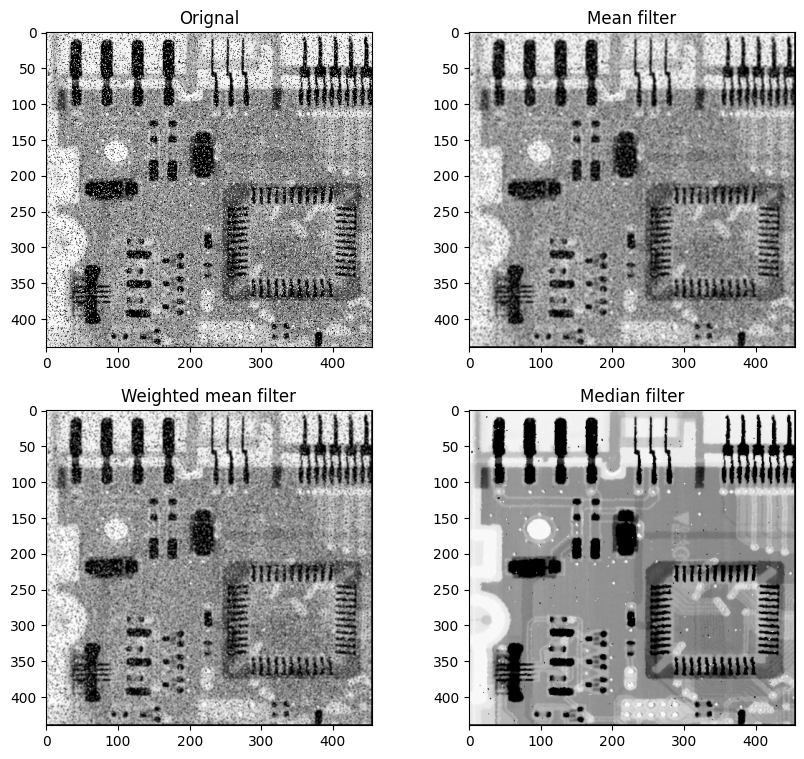

In [5]:
#meanweight
import matplotlib.pyplot as plt
import cv2
import numpy as np
class lowpass_filter (object):
    def __init__ (self, image, convolution=None ) -> None :
        self.img=image
        self.convolution=convolution
        if convolution==True:
            self.init_kernel()
    def init_kernel(self):
        self.MeanKernel33=np.array([[1/9, 1/9, 1/9],
                                    [1/9, 1/9, 1/9],
                                    [1/9, 1/9, 1/9]], dtype ="float")
        self.MeanWeightKernel33=np.array (([ 1/16, 2/16, 1/16],
                                                [2/16, 4/16, 2/16],
                                                [1/16, 2/16, 1/16]) ,dtype ="float")
        
    def choose_kernel (self,name:str ):
        if name == 'Mean':
            kernel = self.MeanKernel33
        elif name == 'MeanWeight':
            kernel = self.MeanWeightKernel33
        else:
            return self.img   
        m, n = self.img.shape
        img_new = np.zeros ([m, n], dtype ="uint8")
        for i in range (1, m-1):
            for j in range (1, n-1):
                temp = self . img [i-1, j-1] * kernel [0, 0]\
                    + self . img [i-1, j] * kernel [0, 1]\
                    + self . img [i-1, j + 1] * kernel [0, 2]\
                    + self . img [i, j-1] * kernel [1, 0]\
                    + self . img [i, j] * kernel [1, 1]\
                    + self . img [i, j + 1] * kernel [1, 2]\
                    + self . img [i + 1, j-1] * kernel [2, 0]\
                    + self . img [i + 1, j] * kernel [2, 1]\
                    + self . img [i + 1, j+1] * kernel [2, 2]
                img_new [i, j]= temp
        img_new = img_new.astype(np.uint8)
        return img_new
    def Median33( self ):
        m, n = self.img.shape
        img_new = np.zeros ([m, n])
        for i in range (1, m - 1):
            for j in range (1, n - 1):
                temp = [ self . img [i - 1, j - 1],
                        self . img [i - 1, j],
                        self . img [i - 1, j + 1],
                        self . img [i, j - 1],
                        self . img [i, j], self . img [i, j + 1],
                        self . img [i + 1, j - 1],
                        self . img [i + 1, j],
                        self . img [i + 1, j + 1]]
                temp = sorted(temp)
                img_new [i, j] = temp [4]
        return img_new
if __name__ == '__main__':
    image = cv2. imread ('D:/test2.tif', 0)
    fig = plt . figure ( figsize =(10, 9))
    ax= fig . subplots (2,2)
    ax[0,0].imshow(image,cmap ="gray")
    ax[0,0].set_title ("Orignal")
    img_filter=lowpass_filter(image,convolution = True )
    ax[0,1].imshow ( img_filter.choose_kernel ('Mean'),cmap ="gray")
    ax[0,1].set_title ("Mean filter")
    ax[1,0].imshow ( img_filter.choose_kernel ('MeanWeight'),cmap ="gray")
    ax[1,0].set_title ("Weighted mean filter")
    img_objectnew = lowpass_filter ( image )
    ax[1,1].imshow (img_objectnew.Median33() ,cmap ="gray")
    ax[1,1].set_title ("Median filter")
    plt.show ()